In [194]:
from typing import TypedDict, Optional
from langgraph.graph import StateGraph, END, START
from IPython.display import Image, display

In [219]:
class AgentState(TypedDict):
    num1:float
    num2:float
    opp1_2:str
    num3:float
    num4:float
    opp3_4:str
    res1_2:float
    res3_4:float

In [220]:
def first_node(state:AgentState)->AgentState:
    """First damb node"""
    print("Let's go...")
    return state

In [221]:
def addition(state:AgentState)->AgentState:
    """This node will perform addition operation"""
    print("sum")
    if state.get('res1_2') is None:
        state['res1_2'] = state['num1'] + state['num2']
    elif state.get('res3_4') is None:
        
        state['res3_4'] = state['num3'] + state['num4']
    return state        

In [222]:
def subtract(state:AgentState)->AgentState:
    """This node will perform addition operation"""
    print("sub")
    if state.get('res1_2') is None:
        state['res1_2'] = state['num1'] - state['num2']
    elif state.get('res3_4') is None:
        state['res3_4'] = state['num3'] - state['num4']
    #print(state)    
    return state        

In [223]:
def path(state:AgentState)->str:
    
    if state.get('res1_2') is None:
        if state.get('opp1_2') == "+":
            return "do_summation"
        else:
            return "do_subtraction"
    elif state.get('res3_4') is None :
   
        if state.get('opp3_4') == "+":
            return "do_summation"
        else:
            return "do_subtraction"
    else:
        return "end"  

In [224]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("add_node", addition)
graph.add_node("sub_node", subtract)

graph.add_edge(START, "first_node")
graph.add_edge("first_node", "router1")

graph.add_node("router1", lambda state:state)

graph.add_conditional_edges(
    "router1", #node name
    path,  #Path -> return string
    # Edges
    {   #Edge : Node 
        "do_summation" : "add_node",
        "do_subtraction" : "sub_node",
        "end" : END

    }



)
graph.add_node("router2", lambda state:state)

graph.add_edge("add_node", "router2")
graph.add_edge("sub_node", "router2")

graph.add_conditional_edges(
    "router2",
    path,

     {   #Edge : Node 
        "do_summation" : "add_node",
        "do_subtraction" : "sub_node",
        "end" : END

    }
)


#graph.add_edge("first_node", END)

In [225]:
app = graph.compile()

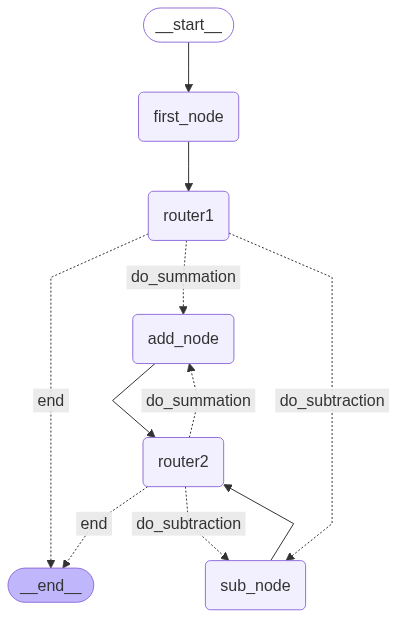

In [226]:
display(Image(app.get_graph().draw_mermaid_png()))

In [227]:
state = AgentState({"num1":10, "num2":5, "opp1_2":"+", "num3":11, "num4":18, "opp3_4":"-"  })

In [228]:
app.invoke(state)

Let's go...
sum
sub


{'num1': 10,
 'num2': 5,
 'opp1_2': '+',
 'num3': 11,
 'num4': 18,
 'opp3_4': '-',
 'res1_2': 15,
 'res3_4': -7}